In [1]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from scipy.io import loadmat
%matplotlib inline

In [2]:
data = loadmat('ex5data1.mat')
X, y = data['X'],data['y']
Xtest,ytest = data['Xtest'],data['ytest']
Xval,yval = data['Xval'],data['yval']
m = y.size

Text(0, 0.5, 'Water flowing out of the dam (y)')

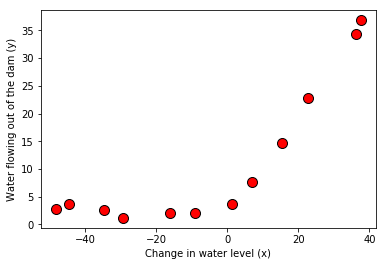

In [3]:
pyplot.plot(X,y,'ro',ms=10,mec='k',mew=1)
pyplot.xlabel('Change in water level (x)')
pyplot.ylabel('Water flowing out of the dam (y)')

In [6]:
def linearRegCostFunction(X,y,theta,lambda_=0.0):
    m = y.size
    J = 0
    theta=theta.reshape((2,1))
    grad = np.zeros(theta.shape)
    
    X = np.concatenate([np.ones(X.shape),X],axis=1)    
    prediction = X.dot(theta)
    
    temp = theta
    temp[0] = 0
    J = 1.0/(2.0*m)*(np.sum((prediction-y)**2))+lambda_/(2.0*m)*(np.sum(temp**2))
    grad = 1.0/m*X.T.dot(prediction-y)+lambda_/m*temp
    
    return J, grad

In [7]:
theta = np.ones((2,1))
J, grad = linearRegCostFunction(X,y,theta,1)
J, grad

(303.9931922202643, array([[-15.30301567],
        [598.25074417]]))

In [22]:
itheta=np.zeros((2,1))
itheta

array([[0.],
       [0.]])

In [23]:
costgradF = lambda t: linearRegCostFunction(X,y,t,lambda_)
lambda_=0

In [25]:
res = optimize.minimize(costgradF,itheta,jac=True,method='tnc',options={'maxiter':1000})
res

     fun: 26.62891562770855
     jac: array([[-12.57079675],
       [-19.76251528]])
 message: 'Linear search failed'
    nfev: 363
     nit: 12
  status: 4
 success: False
       x: array([0.        , 0.26609518])

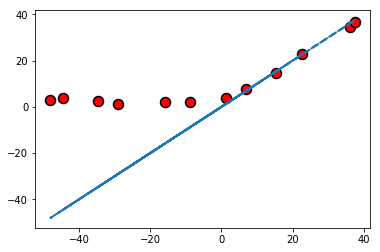

In [28]:
optheta = res.x
pyplot.plot(X,y,'ro',ms=10,mec='k',mew=1.5)
pyplot.plot(X,np.dot(np.concatenate([np.ones((12,1)),X],axis=1),theta),'--',lw=2)